In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import xlwings as xw
import numpy as np

In [39]:
wb=xw.Book('Monte_carlo.xlsx')
sheet=wb.sheets[0]
sheet1=wb.sheets[1]

In [40]:
n_sims=sheet.range('B2').value
Sp_avg=sheet.range('B3').value
Sp_std=sheet.range('B4').value
COGS_avg=sheet.range('B6').value
COGS_std=sheet.range('B7').value
SG_A=sheet.range('B9').value
Mode_units=sheet.range('B14').value
Low_units=sheet.range('B15').value
High_units=sheet.range('B16').value
sims=int(n_sims)

In [41]:
res=np.empty((sims))
for i in range(sims):
    sheet1.range('C8:C19').options(transpose=True).value=np.random.normal(Sp_avg,Sp_std,12)
    sheet1.range('E8:E19').options(transpose=True).value=np.random.normal(COGS_avg,COGS_std,12)
    sheet.range('B9').value=np.random.uniform(SG_A,0.05)
    sheet1.range('B8:B19').options(transpose=True).value=np.random.triangular(Low_units,Mode_units,High_units)
    res[i]=sheet1.range('I20').value

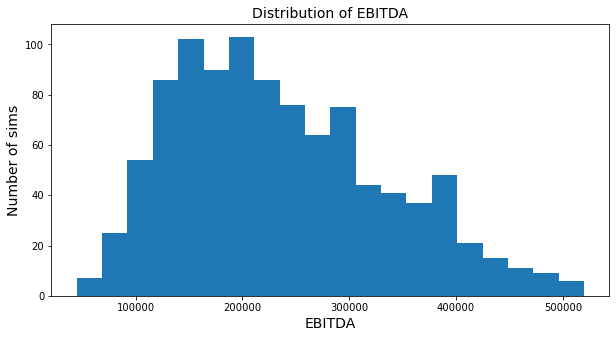

In [45]:
fig=plt.figure(figsize=(10,5))
plt.hist(res,bins=20)
plt.xlabel('EBITDA',fontsize=14)
plt.ylabel('Number of sims',fontsize=14)
plt.title('Distribution of EBITDA',fontsize=14)
plt.show()
plot=sheet.pictures.add(fig,update=True,name='Distribution')
plot.left=sheet.range('H3').left
plot.top=sheet.range('H3').top

In [43]:
sheet.range('K27').value=np.median(res)
sheet.range('K28').value=np.mean(res)
sheet.range('K29').value=np.std(res)